<a href="https://colab.research.google.com/github/Bagyalakshmi1429/Deep-Learning/blob/main/2348508_DL_LAB_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # w1*x1 + w2*x2 + ... + bias
        return 1 if summation > 0 else 0  # Activation function (Heaviside Step Function)

    def train(self, training_inputs, labels, learning_rate=0.1, epochs=100):
        for _ in range(epochs):
            errors = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += learning_rate * (label - prediction) * inputs
                self.weights[0] += learning_rate * (label - prediction)  # Update bias
                errors += int(label != prediction)
            print(f"Errors: {errors} / {len(labels)}")
            if errors == 0:
                print("All data points classified correctly.")
                break
        print("Final weights:", self.weights)

# Training data for boolean functions
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

nand_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
nand_labels = np.array([1, 1, 1, 0])

xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

# Train the perceptron for each boolean function
and_perceptron = Perceptron(2)
print("Training AND Perceptron:")
and_perceptron.train(and_inputs, and_labels)

or_perceptron = Perceptron(2)
print("\nTraining OR Perceptron:")
or_perceptron.train(or_inputs, or_labels)

nand_perceptron = Perceptron(2)
print("\nTraining NAND Perceptron:")
nand_perceptron.train(nand_inputs, nand_labels)

# XOR requires a different approach due to non-linear separability
print("\nXOR function requires a multi-layer perceptron or a different approach due to non-linear separability.")



Training AND Perceptron:
Errors: 1 / 4
Errors: 3 / 4
Errors: 3 / 4
Errors: 2 / 4
Errors: 1 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [-0.2  0.2  0.1]

Training OR Perceptron:
Errors: 1 / 4
Errors: 2 / 4
Errors: 1 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [0.  0.1 0.1]

Training NAND Perceptron:
Errors: 2 / 4
Errors: 3 / 4
Errors: 3 / 4
Errors: 0 / 4
All data points classified correctly.
Final weights: [ 0.2 -0.2 -0.1]

XOR function requires a multi-layer perceptron or a different approach due to non-linear separability.


Number of iterations: 35


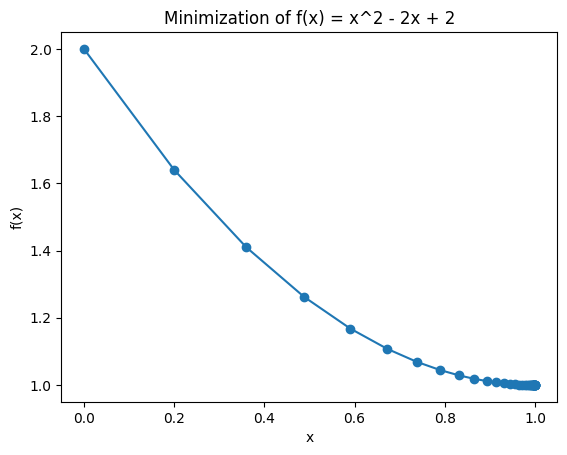

Number of iterations: 1000


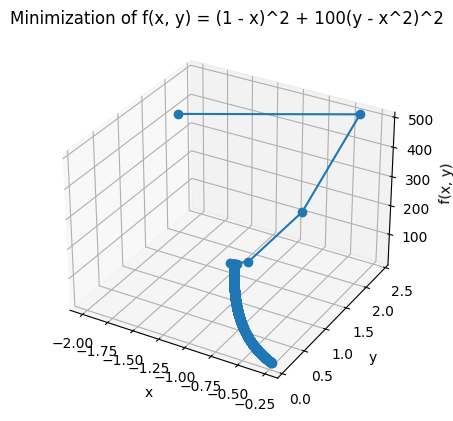

In [ ]:
import matplotlib.pyplot as plt

# Gradient descent function for single variable
def gradient_descent_single_variable(learning_rate, initial_x, precision, max_iterations):
    x = initial_x
    iterations = 0
    x_list = [x]
    y_list = [x**2 - 2*x + 2]

    while True:
        gradient = 2*x - 2
        new_x = x - learning_rate * gradient
        x_list.append(new_x)
        y_list.append(new_x**2 - 2*new_x + 2)

        if abs(new_x - x) < precision or iterations == max_iterations:
            break
        else:
            x = new_x
            iterations += 1

    print("Number of iterations:", iterations)

    plt.plot(x_list, y_list, 'o-')
    plt.title("Minimization of f(x) = x^2 - 2x + 2")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

# Gradient descent function for two variables
def gradient_descent_two_variables(learning_rate, initial_x, initial_y, precision, max_iterations):
    x = initial_x
    y = initial_y
    iterations = 0
    x_list = [x]
    y_list = [y]
    z_list = [(1 - x)**2 + 100*(y - x**2)**2]

    while True:
        grad_x = -2*(1 - x) - 400*x*(y - x**2)
        grad_y = 200*(y - x**2)
        new_x = x - learning_rate * grad_x
        new_y = y - learning_rate * grad_y
        x_list.append(new_x)
        y_list.append(new_y)
        z_list.append((1 - new_x)**2 + 100*(new_y - new_x**2)**2)

        if np.sqrt((new_x - x)**2 + (new_y - y)**2) < precision or iterations == max_iterations:
            break
        else:
            x = new_x
            y = new_y
            iterations += 1

    print("Number of iterations:", iterations)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_list, y_list, z_list, marker='o')
    ax.set_title("Minimization of f(x, y) = (1 - x)^2 + 100(y - x^2)^2")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.show()

# Applying gradient descent to the given equations
gradient_descent_single_variable(0.1, 0.0, 0.0001, 1000)
gradient_descent_two_variables(0.001, -2.0, 2.0, 0.0001, 1000)
